# 4.9: 基于量子纠缠的特征选择

> References:
> * _Feature Extraction by Tensor Network Machine Learning_
> * _Unsupervised Recognition of Informative Features via Tensor Network Machine Learning and Quantum Entanglement Variations_


核心思想：利用量子概率诠释实现特征提取，属于量子启发（quantum-inspired）的机器学习解释性（interpretability）理论

本节的核心概念：二分纠缠熵（bipartite entanglement entropy）

在[2.6](./2-6.ipynb)中：从约化密度算符出发给出了二分纠缠谱的定义，可通过量子波函数（量子态系数）的奇异谱（奇异谱与奇异值分解的相关内容可参考[1.7](./1-7.ipynb)）或约化矩阵的本征谱给出

在[4.2](./4-2.ipynb)：我们讨论了矩阵乘积态纠缠谱与中心正交形式间的关系，并利用纠缠谱的裁剪实现了中心正交矩阵乘积态的虚拟维数最优裁剪。

## 二分纠缠熵

二分纠缠熵的统计意义来源于冯诺伊曼熵(von Neumann entropy)：系统混乱程度的刻画

设系统存在K个可能的**状态**，处于各个状态的**概率**记为$p_k$ $(k = 0,...,K-1)$，则冯诺伊曼熵满足

$$S_{VN} = -\sum_k p_k \ln p_k$$

有$p_k \geq 0$且$\sum_{k=0}^{K-1} p_k = 1$，且规定$0 \ln 0 = 0$ (该式在从原点右侧趋向于0的极限下成立)，则可以证明$0 \leq S_{VN} \leq \ln K$，当且仅当 $p_0 = p_k = \cdots = p_{K-1} = 1/K$时，右侧等号成立，$S_{VN}$极大。

> 例子，投骰子：
> 
> 所有面出现的概率都相等$p_0 = p_1 = \cdots = p_5 = 1/6$，此时相当于我们对于骰子出现的面是完全没有信息的，即不确定性最大，无论采取什么样的策略，猜中的几率均为1/6。但当骰子出现了某种问题导致某一面的概率大于了1/6，此时我们只需要猜概率最大的那一面即可，猜对的概率将大于1/6，对应的冯诺伊曼熵也会小于最大值$\ln 6$，且相对于最大值的熵的减小量刻画了上述情况下信息的增量。


### 经典和量子的本质区别

* 量子系统的状态可定义为叠加态
* 量子系统状态的定义直接影响其混乱程度的刻画

> 例：一枚经典或量子硬币（量子比特）
>
> * 状态自然地应该是"朝上"（记为0）与"朝下"（记为1），则对应的冯诺伊曼熵为$S_{VN} = -p_0 \ln p_0 - p_1 \ln p_1$；
> * 设其所处量子态为纯态$|\psi\rangle$，我们当然可以通过测量获得其向上或向下的概率$p_s = \langle\psi|s\rangle\langle s|\psi\rangle$ ($s = 0$或$1$，参考第二章第3节）子系统状态的定义直接影响其混乱程度的刻画；
> * 此时相当于选择测量算符为 $\hat{M}^{(0)} = |0\rangle\langle0|$、$\hat{M}^{(1)} = |1\rangle\langle1|$，有 $p_s = \langle\psi|\hat{M}^{(s)}|\psi\rangle$
> * 变换一组测量算符，例如$\hat{M}^{(0)} = \frac{1}{2}(|0\rangle + |1\rangle)(\langle0| + \langle1|)$、$\hat{M}^{(1)} = \frac{1}{2}(|0\rangle - |1\rangle)(\langle0| - \langle1|)$，通过简单计算得到不同的冯诺依曼熵；
> * 显然：量子系统的冯诺依曼熵与测量算符的选择相关，即量子系统的混乱程度或信息量不单单取决于系统本身，还取决于观察者的视角（测量算符的选择），这点是与经典系统具有本质区别的。
> * 注：合法的测量算符需满足
>   $$\sum_s \hat{M}^{(s)} = \hat{I}$$
>   易证，上述公式对应于测量算符得到的概率分布的归一性$\sum_s p_s = 1$。
>

### 二分纠缠熵的数学定义

> 为什么要用二分纠缠熵：冯诺依曼熵会随着量子系统状态的定义而变化，不适合直接使用，见上述例子

定义：将系统分为两部分，对某个子体系测量所得概率分布的最小冯诺伊曼熵
$$S = \min_{\{M^{(s)}\}} S_{VN}(\{M^{(s)}\})$$

> 为什么要二分：因为对于纯态而言，最小的冯诺依曼熵是 0，因为
> 1. 纯态总可以找到一个规范正交基底
> 2. 这个规范正交基底下，冯诺依曼熵计算为 0

根据线性代数，上述极小化问题的解可由本征值分解或奇异值分解给出。具体而言，纠缠熵可由系数矩阵的奇异谱（记为 $\Gamma$）或约化矩阵的本征谱（记为 $\Lambda$）给出，满足
$$S = -\sum_s \Gamma_s^2 \ln \Gamma_s^2 = -\sum_s \Lambda_s \ln \Lambda_s$$

其中 $\Lambda$ 被称为纠缠谱，这是因为它实际上对应纠缠哈密顿量（entanglement Hamiltonian）的能谱；$\Gamma$ 被称为施密特系数（Schmidt coefficients）[参考 Hui Li and F. D. M. Haldane, Phys. Rev. Lett. 101, 010504 (2008)]

物理意义：笼统地认为是量子版本的关联函数

性质：
* 约化矩阵的本征谱=原矩阵奇异谱的平方，两种方式算出来的纠缠是一致；
* 系数矩阵的左、右约化矩阵的本征谱相等，因此二者会得到一致的纠缠熵，也说明了左、右两个子体系测量获得的冯诺伊曼熵的下限是相等的；
* 纠缠熵可以直接通过任意一个子系统的约化密度矩阵（记为$\hat{\rho}_R$）来表示
  $$S = -\text{Tr}(\hat{\rho}_R \ln \hat{\rho}_R)$$
  式中的对数函数ln作用在算符上，并非是对算符的各个系数取对数；
* 如果量子态为两个子系统各自态的直积，则该两个子系统间的二分纠缠熵为0，反过来也是成立的，即二分纠缠熵为0的量子态为直积态。

In [1]:
import torch
from tensor_network.tensor_gates.functional import rand_unitary
from tensor_network.quantum_state.functional import calc_reduced_density_matrix
import matplotlib.pyplot as plt

complex_dtype = torch.complex64

In [2]:
def calculate_entropy_by_sampling(rdm: torch.Tensor, measure_times: int):
    entropies = []
    for _ in range(measure_times):
        basis = rand_unitary(2, dtype=complex_dtype)
        basis_0 = basis[:, 0]
        basis_1 = basis[:, 1]

        p_basis0 = torch.einsum("a, ab, b->", basis_0.conj(), rdm, basis_0).real
        p_basis1 = torch.einsum("a, ab, b->", basis_1.conj(), rdm, basis_1).real

        entropy = -p_basis0 * torch.log(p_basis0) - p_basis1 * torch.log(p_basis1)
        entropies.append(entropy)
    return torch.stack(entropies)

In [3]:
qubit_state = torch.randn(2, 2, dtype=complex_dtype)
qubit_state = qubit_state / torch.linalg.norm(qubit_state)

rdm_1 = calc_reduced_density_matrix(qubit_state, 0)  # reducing qubit-0, ρ₀
# rdm_1 = qubit_state.conj().mm(qubit_state.t()) # the same as above
rdm_0 = calc_reduced_density_matrix(qubit_state, 1)  # reducing qubit-1, ρ₁

eigval_1 = torch.linalg.eigvalsh(rdm_1)
eigval_0 = torch.linalg.eigvalsh(rdm_0)

entropy_1 = -eigval_1.inner(torch.log(eigval_1))
entropy_0 = -eigval_0.inner(torch.log(eigval_0))

assert entropy_1.isclose(entropy_0)
ref_entropy = entropy_1

measure_times = 600

entropies_1 = calculate_entropy_by_sampling(rdm_1, measure_times)
sample_entropy_1 = entropies_1.min()

entropies_0 = calculate_entropy_by_sampling(rdm_0, measure_times)
sample_entropy_0 = entropies_0.min()

print(f"""
Reference entropy: {ref_entropy.item()}
Sample entropy on qubit-0: {sample_entropy_0.item()}
Sample entropy on qubit-1: {sample_entropy_1.item()}
""")


Reference entropy: 0.33274590969085693
Sample entropy on qubit-0: 0.33405810594558716
Sample entropy on qubit-1: 0.33281153440475464



In [4]:
def plot_sampled_entropy(
    entropies: torch.Tensor, ref_entropy: torch.Tensor, max_entropy: torch.Tensor
):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(entropies)), entropies, c="blue", label="Sampled entropies")
    plt.axhline(y=ref_entropy.item(), color="g", linestyle="--", label="Reference entropy")
    plt.axhline(y=max_entropy.item(), color="r", linestyle="--", label="Max entropy")
    plt.xlabel("Sample index")
    plt.ylabel("Entropy")
    plt.title("Entropy Sampling Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

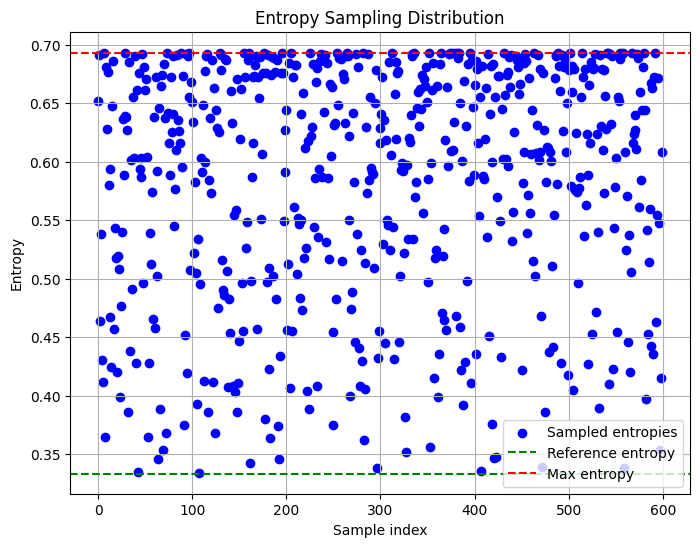

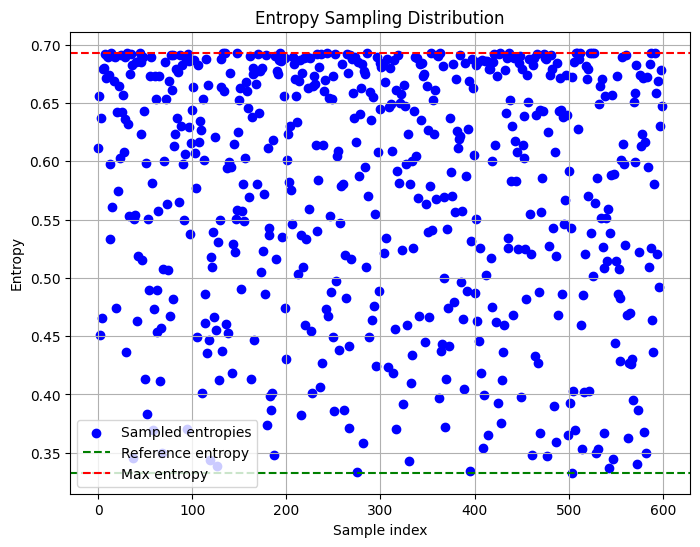

In [5]:
max_entropy = torch.log(torch.tensor(2))

plot_sampled_entropy(entropies_0, ref_entropy, max_entropy)
plot_sampled_entropy(entropies_1, ref_entropy, max_entropy)

### 单点纠缠熵 (On-site Entanglement Entropy) 实现特征选择

定义单点纠缠熵实现特征选择：

$$S_l = -\text{Tr}(\hat{\rho}^{[l]} \ln \hat{\rho}^{[l]})$$

其中 $\hat{\rho}^{[l]}$ 为第 $l$ 个量子比特对应的约化密度算符

两个$S_l = 0$的特殊情况来理解单点纠缠熵：

1. 假设第$l$个像素在所有样本中都取同一个值，例如MNIST数据集中处于边缘的像素为一般为黑色，在cos-sin特征映射下对应于$|0\rangle$，其懒惰态一定具有如下形式
   $$|\psi\rangle = |0\rangle|\psi'\rangle$$
   其中$|\psi'\rangle$为除第$l$个量子位外其余量子位对应的某量子态，懒惰态为$|\psi'\rangle$与第$l$个量子位的$|0\rangle$态的直积态。易得，第$l$个量子位对应的约化密度算符满足
   $$\hat{\rho}^{[l]} = \text{Tr}_{/l}|\psi\rangle\langle\psi| = \langle\psi'|\psi'\rangle|0\rangle\langle0| = |0\rangle\langle0|$$
   第 $l$ 个量子位的单体纠缠熵 $S_l = 0$ 因为单秩矩阵的本征谱为 `[1, 0, 0, ...]`
2. 对于某特征，其在各个样本的取值虽然不同，但和其他特征的取值没有关联。例如，考虑黑白图片（即像素取值只能为0或1）数据集，设图片总是以以下方式成对出现在数据集中的，例如设$l = 0$，如果图片$[0,1,1,0,1,0, ... ]$在数据集中，那么我们设图片$[1,1,1,0,1,0, ... ]$也在数据集中。在这种情况下，数据集对应的懒惰态满足
   $$|\psi\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}|\tilde{\psi}\rangle$$
   此时也有$S_l = 0$，这个性质对于生成式张量网络态也成立。

笼统地讲单点纠缠熵的物理意义：
* 根据纠缠熵的极小点的性质，当我们使用量子态来表示联合概率分布时，单点纠缠熵 $S_1$ 给出的是测量该量子位能得到的信息增量的下限。
* 简而言之，单点纠缠熵在实现特征选择上具有较为明确的量子性的统计意义，并且在张量网络方法的帮助下，其计算比大部分经典特征选择方法更加简洁、高效，并不需要人为设计各种各样的计算策略。

#### Code

In [6]:
from tensor_network.mps.modules import MPS, MPSType
from tensor_network.utils.data import load_mnist_images
from typing import List
from tensor_network.algorithms.gmps import gmps_classify, train_gmps, eval_nll
from tensor_network.feature_mapping import cossin_feature_map
from tqdm.auto import tqdm
import json

In [7]:
# |export mps.modules


def _entanglement_entropy_onsite(
    self: MPS, indices: List[int] | None = None, eps: float = 1e-10
) -> torch.Tensor:
    """
    Calculate the onsite entanglement entropies for qubits at `indices`.

    Args:
        indices: The indices of the qubits to calculate the entanglement entropies. If `None`, calculate for all qubits.
        eps: The small value to avoid log(0). Default is 1e-10.

    Returns:
        The entanglement entropies for the qubits at `indices`.
    """
    if indices is None:
        indices = list(range(self._length))
    assert 0 < len(indices) <= self._length, "indices must be a list of indices in [0, length)"

    rdms = [
        self.one_body_reduced_density_matrix(idx=idx, do_tracing=True, inplace_mutation=True)
        for idx in indices
    ]
    rdms = torch.stack(rdms)  # (length, 2, 2)
    eigenvalues = torch.linalg.eigvalsh(rdms)  # (length, 2)
    probs = eigenvalues / eigenvalues.sum(dim=1, keepdim=True)  # (length, 2)
    probs[probs < eps] = eps
    entropies = -(probs * torch.log(probs)).sum(dim=1)  # (length,)
    return entropies


# monkey patch from 4-9.ipynb to avoid code clutter
MPS.entanglement_entropy_onsite = _entanglement_entropy_onsite

In [8]:
classes = list(range(10))
test_device = torch.device("cpu")

In [9]:
gmpss = []

for train_class in classes:
    path = f"datasets/mps/mnist_{train_class}_mps.safetensors"
    mps = MPS.load_from_safetensors(path, requires_grad=False)
    mps.to_(device=test_device)
    gmpss.append(mps)

onsite_entanglement_entropies = [m.entanglement_entropy_onsite() for m in gmpss]

##### Visualization

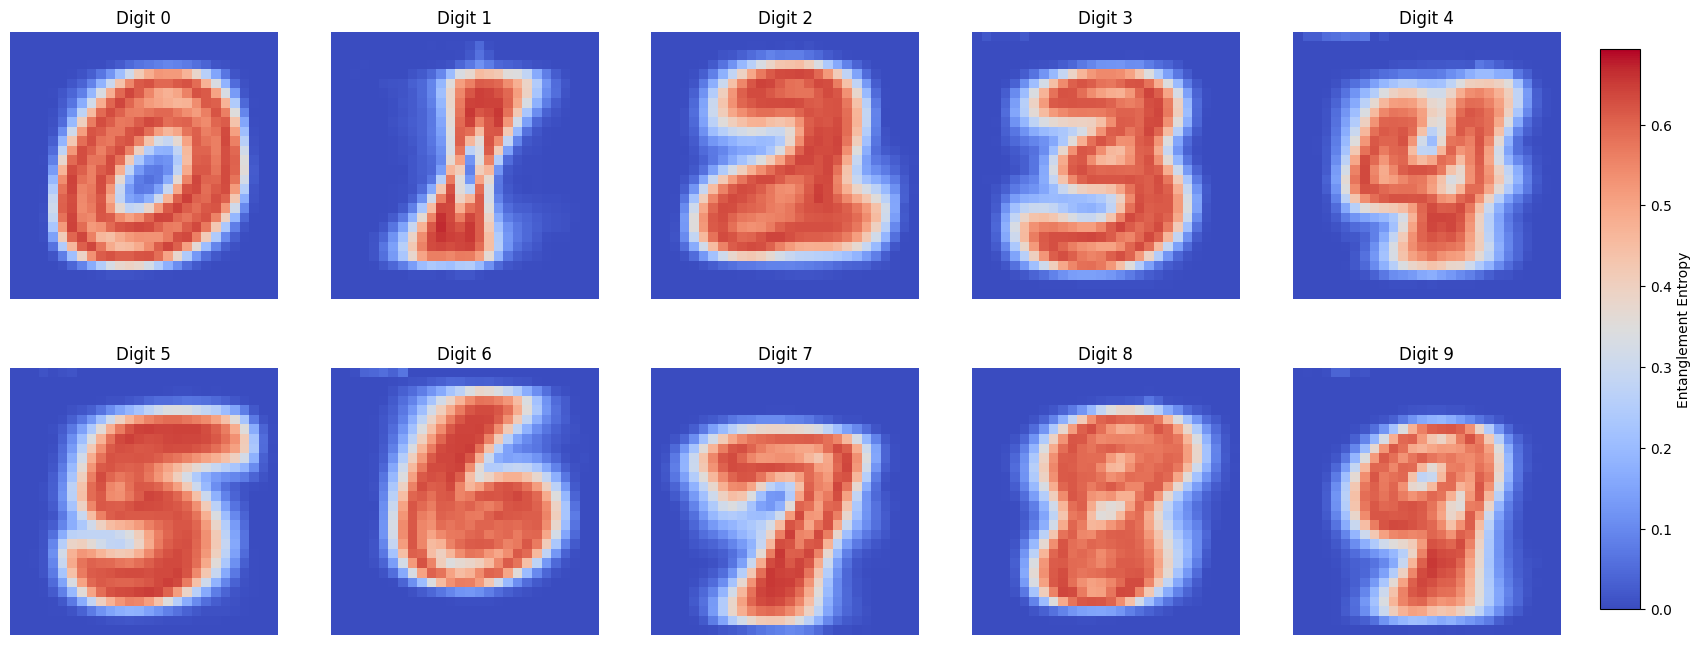

In [10]:
# since the cossin feature map gives 2-dimensional feature space
max_entropy = torch.log(torch.tensor(2.0))
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, entropy in enumerate(onsite_entanglement_entropies):
    im = axes[i].imshow(entropy.reshape(28, 28), cmap="coolwarm", vmin=0, vmax=max_entropy)
    axes[i].set_title(f"Digit {i}")
    axes[i].axis("off")

# Add a single colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Entanglement Entropy")

plt.show()

##### Accuracy Comparison

In [11]:
cache_path = "datasets/MNIST"
MNIST_NORMALIZATION = False
COSSIN_THETA = 0.5

In [12]:
mnist_train_data, mnist_train_labels = load_mnist_images(
    cache_path=cache_path,
    num=None,
    from_subset="train",
    shuffle=True,
    normalization=MNIST_NORMALIZATION,
    return_labels=True,
)
mnist_test_data, mnist_test_labels = load_mnist_images(
    cache_path=cache_path,
    num=None,
    from_subset="test",
    shuffle=False,
    normalization=MNIST_NORMALIZATION,
    return_labels=True,
)

mnist_train_data = mnist_train_data.reshape(-1, 28 * 28)
mnist_test_data = mnist_test_data.reshape(-1, 28 * 28)

mnist_train_data = mnist_train_data.to(device=test_device)
mnist_train_data = cossin_feature_map(mnist_train_data, theta=COSSIN_THETA)
mnist_test_data = mnist_test_data.to(device=test_device)
mnist_test_data = cossin_feature_map(mnist_test_data, theta=COSSIN_THETA)

mnist_train_labels = mnist_train_labels.to(device=test_device)
mnist_test_labels = mnist_test_labels.to(device=test_device)

###### All Features in Training and Inference

In [13]:
gmpsc_train_preds = gmps_classify(gmpss, mnist_train_data, progress_bar_kwargs={"disable": False})
gmpsc_test_preds = gmps_classify(gmpss, mnist_test_data, progress_bar_kwargs={"disable": False})
gmpsc_train_acc = (gmpsc_train_preds == mnist_train_labels).float().mean()
gmpsc_test_acc = (gmpsc_test_preds == mnist_test_labels).float().mean()
print(f"Train accuracy: {gmpsc_train_acc:.4f}, Test accuracy: {gmpsc_test_acc:.4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Train accuracy: 0.9960, Test accuracy: 0.9721


###### Selected Features in Training and Inference

In [14]:
# hyperparameters
train_device = torch.device("cpu")
lr = 1e-1
sweep_times = 10

physical_dim = 2  # since we use cossin feature map
virtual_dim = 64

feature_nums = [15, 20, 50, 100, 200, 300, 400, 500, 600]

In [15]:
# Need to use summed OEE across all classes because when doing classification, we don't know which class the data belongs to
oee = torch.stack(onsite_entanglement_entropies).to(train_device).sum(dim=0)  # (28*28)
feature_indices_sorted_by_oee = torch.argsort(oee, descending=True)  # (28*28)

In [16]:
skip_training = True
progress_bar = tqdm(feature_nums)

for feature_num in progress_bar:
    if skip_training:
        break
    progress_bar.set_description(f"Training GMPS - {feature_num} features")
    class_progress_bar = tqdm(classes, leave=False)
    selected_feature_indices = feature_indices_sorted_by_oee[:feature_num]
    for train_class in class_progress_bar:
        class_progress_bar.set_description(f"Class {train_class}")
        # training
        gmps_train_data = mnist_train_data[mnist_train_labels == train_class]
        gmps_train_data = gmps_train_data[:, selected_feature_indices]
        mps = MPS(
            length=feature_num,
            physical_dim=physical_dim,
            virtual_dim=virtual_dim,
            mps_type=MPSType.Open,
            dtype=torch.float32,
            device=train_device,
            requires_grad=False,
        )
        losses, mps = train_gmps(
            samples=gmps_train_data,
            batch_size=gmps_train_data.shape[0],
            mps=mps,
            sweep_times=sweep_times,
            lr=lr,
            device=train_device,
            enable_tsgo=True,
            progress_bar_kwargs={"leave": False},
        )
        # testing
        gmps_test_data = mnist_test_data[mnist_test_labels == train_class]
        gmps_test_data = gmps_test_data[:, selected_feature_indices]
        train_min_nll = losses.min()
        test_nll = eval_nll(samples=gmps_test_data, mps=mps, device=train_device)
        # saving
        mps_path = f"datasets/mps/mnist_{train_class}_mps_feature_{feature_num}.safetensors"
        json_path = f"datasets/mps/mnist_{train_class}_mps_feature_{feature_num}.json"
        metadata = {
            "hyperparameters": {
                "feature_num": feature_num,
                "physical_dim": physical_dim,
                "virtual_dim": virtual_dim,
            },
            "selected_feature_indices": selected_feature_indices.tolist(),
            "train_min_nll": train_min_nll.item(),
            "test_nll": test_nll.item(),
        }
        with open(json_path, "w") as f:
            json.dump(metadata, f)
        mps.save_to_safetensors(mps_path)

  0%|          | 0/9 [00:00<?, ?it/s]

In [17]:
gmpss_selected_features = {}

for feature_num in feature_nums:
    gmps_selected = []
    for train_class in classes:
        mps_path = f"datasets/mps/mnist_{train_class}_mps_feature_{feature_num}.safetensors"
        json_path = f"datasets/mps/mnist_{train_class}_mps_feature_{feature_num}.json"
        with open(json_path, "r") as f:
            metadata = json.load(f)
        mps = MPS.load_from_safetensors(mps_path, requires_grad=False)
        mps.to_(device=test_device)
        mps.metadata = metadata
        gmps_selected.append(mps)
    gmpss_selected_features[feature_num] = gmps_selected

In [18]:
gmpss_selected_train_acc = {}
gmpss_selected_test_acc = {}

for feature_num in tqdm(gmpss_selected_features):
    gmps_selected = gmpss_selected_features[feature_num]
    selected_feature_indices = torch.tensor(
        gmps_selected[0].metadata["selected_feature_indices"], dtype=torch.long, device=test_device
    )
    train_data_selected = mnist_train_data[:, selected_feature_indices, :]
    train_preds = gmps_classify(
        gmps_selected, train_data_selected, progress_bar_kwargs={"disable": True}
    )
    train_acc = (train_preds == mnist_train_labels).float().mean()

    test_data_selected = mnist_test_data[:, selected_feature_indices, :]
    test_preds = gmps_classify(
        gmps_selected, test_data_selected, progress_bar_kwargs={"disable": True}
    )
    test_acc = (test_preds == mnist_test_labels).float().mean()
    gmpss_selected_train_acc[feature_num] = train_acc
    gmpss_selected_test_acc[feature_num] = test_acc

gmpss_selected_train_acc[784] = gmpsc_train_acc
gmpss_selected_test_acc[784] = gmpsc_test_acc

  0%|          | 0/9 [00:00<?, ?it/s]

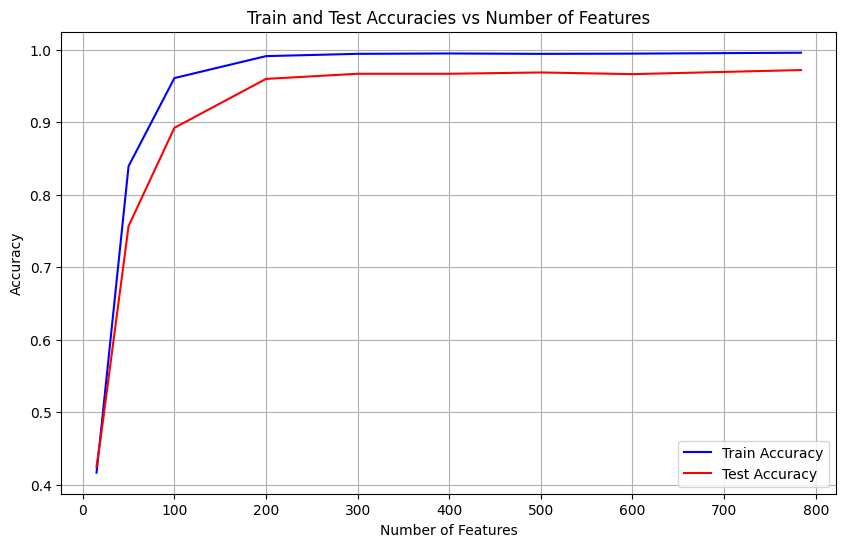

In [19]:
selected_feature_nums = list(gmpss_selected_train_acc.keys())
train_accuracies = list(gmpss_selected_train_acc.values())
test_accuracies = list(gmpss_selected_test_acc.values())

plt.figure(figsize=(10, 6))
plt.plot(selected_feature_nums, train_accuracies, "b-", label="Train Accuracy")
plt.plot(selected_feature_nums, test_accuracies, "r-", label="Test Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracies vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()

###### All Features in Training and Selected Features in Inference

In [20]:
import tensor_network.setup_ref_code_import as _
from Library.MatrixProductState import generative_MPS
from einops import einsum
from tensor_network.algorithms.gmps import calc_nll

EPS = 1e-14

In [21]:
# |export algorithms.gmps
from typing import Literal


@torch.compile(dynamic=True)
def _left_to_right_step(
    local_tensor_i: torch.Tensor, env_vectors_left: torch.Tensor, sample_i: torch.Tensor
) -> torch.Tensor:
    new_local_tensor = einsum(
        local_tensor_i,
        sample_i,
        "left physical right, batch physical -> batch left right",
    )
    return einsum(
        new_local_tensor.conj(),
        env_vectors_left,
        new_local_tensor,
        "batch left_conj right_conj, batch left_conj left, batch left right -> batch right_conj right",
    )


def _map_left_to_right(
    local_tensor_i: torch.Tensor, env_vectors_left: torch.Tensor, sample_i: torch.Tensor
) -> torch.Tensor:
    # local_tensor_i: (left_virtual_dim, physical_dim, right_virtual_dim)
    # env_vectors_left: (left_virtual_dim)
    # sample_i: (physical_dim)
    new_local_tensor = einsum(
        local_tensor_i,
        sample_i,
        "left physical right, physical -> left right",
    )
    return einsum(
        new_local_tensor.conj(),
        env_vectors_left,
        new_local_tensor,
        "left_conj right_conj, left_conj left, left right -> right_conj right",
    )


_left_to_right_step_vmapped = torch.compile(
    torch.vmap(_map_left_to_right, in_dims=(None, 0, 0)), dynamic=True
)


@torch.compile(dynamic=True)
def _right_to_left_step(
    local_tensor_i: torch.Tensor, env_vectors_right: torch.Tensor, sample_i: torch.Tensor
) -> torch.Tensor:
    new_local_tensor = einsum(
        local_tensor_i,
        sample_i,
        "left physical right, batch physical -> batch left right",
    )
    return einsum(
        new_local_tensor.conj(),
        env_vectors_right,
        new_local_tensor,
        "batch left_conj right_conj, batch right_conj right, batch left right -> batch left_conj left",
    )


def _map_right_to_left(
    local_tensor_i: torch.Tensor, env_vectors_right: torch.Tensor, sample_i: torch.Tensor
) -> torch.Tensor:
    # local_tensor_i: (left_virtual_dim, physical_dim, right_virtual_dim)
    # env_vectors_right: (right_virtual_dim)
    # sample_i: (physical_dim)
    new_local_tensor = einsum(
        local_tensor_i,
        sample_i,
        "left physical right, physical -> left right",
    )
    return einsum(
        new_local_tensor.conj(),
        env_vectors_right,
        new_local_tensor,
        "left_conj right_conj, right_conj right, left right -> left_conj left",
    )


_right_to_left_step_vmapped = torch.compile(
    torch.vmap(_map_right_to_left, in_dims=(None, 0, 0)), dynamic=True
)


def eval_nll_selected_features(
    *,
    samples: torch.Tensor,
    mps: MPS,
    indices: List[int] | torch.Tensor,
    device: torch.device,
    return_avg: bool = True,
    compute_method: Literal["compiled_einsum", "vmap"] = "vmap",
    progress_bar_kwargs: dict = {},
) -> torch.Tensor:
    """
    Evaluate the negative log likelihood of the MPS, given the feature-mapped samples.

    Args:
        samples: torch.Tensor, the feature-mapped samples.
        mps: MPS, the MPS to evaluate the negative log likelihood of.
        indices: the positions of features to be evaluated at.
        device: torch.device, the device to evaluate the negative log likelihood on.
        return_avg: bool, whether to return the average negative log likelihood.
        compute_method: Literal["compiled_einsum", "vmap"], underlying implementation of the heavylifting steps. "vmap" is usually faster but with more memory consumption.
    Returns:
        torch.Tensor, the negative log likelihood of the MPS.
    """
    assert samples.ndim == 3  # (dataset_size, feature_num, feature_dim)
    assert mps.center is not None
    dataset_size, feature_num, _ = samples.shape
    assert feature_num == mps.length
    assert isinstance(indices, (List, torch.Tensor))
    if isinstance(indices, torch.Tensor):
        assert indices.ndim == 1
        assert indices.dtype == torch.long
        assert indices.min() >= 0
        assert indices.max() < feature_num
        indices = indices.tolist()
    list_length = len(indices)
    indices = set(indices)
    assert len(indices) == list_length, "indices must be unique"
    # set default device to device
    prev_device = torch.get_default_device()
    torch.set_default_device(device)
    mps_local_tensors = mps.local_tensors
    batch_size = dataset_size  # since we do the init NLL evaluation in one go
    env_vectors_left = torch.ones(batch_size, 1, 1, dtype=samples.dtype)
    env_vectors_right = torch.ones(batch_size, 1, 1, dtype=samples.dtype)
    norm_factors = torch.ones(batch_size, feature_num)

    def samples_at(idx):
        return samples[:, idx, :]  # (batch, feature_dim)

    left_to_right_step = (
        _left_to_right_step if compute_method == "compiled_einsum" else _left_to_right_step_vmapped
    )
    right_to_left_step = (
        _right_to_left_step if compute_method == "compiled_einsum" else _right_to_left_step_vmapped
    )

    for idx in tqdm(range(mps.center), **progress_bar_kwargs):
        local_tensor_i = mps_local_tensors[
            idx
        ]  # (left_virtual_dim, physical_dim, right_virtual_dim)
        if idx in indices:
            env_vectors_left = left_to_right_step(local_tensor_i, env_vectors_left, samples_at(idx))
        else:
            env_vectors_left = einsum(
                local_tensor_i.conj(),
                env_vectors_left,
                local_tensor_i,
                "left_conj physical right_conj, batch left_conj left, left physical right -> batch right_conj right",
            )

        norm = env_vectors_left.norm(dim=[1, 2])  # (batch)
        norm_factors[:, idx] = norm
        env_vectors_left = env_vectors_left / (norm.reshape(batch_size, 1, 1) + EPS)

    for idx in tqdm(range(feature_num - 1, mps.center, -1), **progress_bar_kwargs):
        local_tensor_i = mps_local_tensors[
            idx
        ]  # (left_virtual_dim, physical_dim, right_virtual_dim)
        if idx in indices:
            env_vectors_right = right_to_left_step(
                local_tensor_i, env_vectors_right, samples_at(idx)
            )
        else:
            env_vectors_right = einsum(
                local_tensor_i.conj(),
                env_vectors_right,
                local_tensor_i,
                "left_conj physical right_conj, batch right_conj right, left physical right -> batch left_conj left",
            )

        norm = env_vectors_right.norm(dim=[1, 2])  # (batch)
        norm_factors[:, idx] = norm
        env_vectors_right = env_vectors_right / (norm.reshape(batch_size, 1, 1) + EPS)

    center_tensor = mps_local_tensors[
        mps.center
    ]  # (left_virtual_dim, physical_dim, right_virtual_dim)
    if mps.center in indices:
        new_center_tensor = einsum(
            center_tensor,
            samples_at(mps.center),
            "left physical right, batch physical -> batch left right",
        )
        norm = einsum(
            env_vectors_left,
            new_center_tensor.conj(),
            new_center_tensor,
            env_vectors_right,
            "batch left_conj left, batch left_conj right_conj, batch left right, batch right_conj right -> batch",
        ).abs()
    else:
        norm = einsum(
            center_tensor.conj(),
            center_tensor,
            env_vectors_left,
            env_vectors_right,
            "left_conj physical right_conj, left physical right, batch left_conj left, batch right_conj right -> batch",
        ).abs()
    norm_factors[:, mps.center] = norm
    if return_avg:
        nll = calc_nll(norm_factors).mean()
    else:
        nll = calc_nll(norm_factors)  # (batch)
    # restore the default device
    torch.set_default_device(prev_device)
    return nll

Test `eval_nll_selected_features`

In [22]:
import random


def rand_indices(num: int, max_val: int) -> torch.Tensor:
    return torch.tensor(random.sample(range(max_val), num), dtype=torch.long)

In [26]:
nll_all_ref = eval_nll(
    samples=mnist_train_data[:20], mps=gmpss[0], device=test_device, return_avg=False
)
nll_all = eval_nll_selected_features(
    samples=mnist_train_data[:20],
    mps=gmpss[0],
    indices=list(range(gmpss[0].length)),
    device=test_device,
    return_avg=False,
)
# since we've multiplied the local tensor with its conjugate, the norm is squared, hence the log is twice as large
nll_all = nll_all / 2
# this assertion is a bit flaky
assert torch.allclose(nll_all_ref.mean(), nll_all.mean()), (
    f"\nref_nll: {nll_all_ref.mean()}\nmy_nll: {nll_all.mean()}"
)

  0%|          | 0/783 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [27]:
my_gmps = gmpss[0]
tensors = [t.clone() for t in my_gmps.local_tensors]
ref_gmps = generative_MPS(
    tensors=tensors, para={"dtype": torch.float32, "device": test_device, "eps": EPS}
)
feature_num = my_gmps.length
physical_dim = 2
indices_num = 10
sample_num = 20

for _ in range(5):
    selected_indices = rand_indices(indices_num, feature_num)
    test_samples = mnist_train_data[rand_indices(sample_num, mnist_train_data.shape[0])]
    assert test_samples.shape == (sample_num, feature_num, physical_dim)
    ref_test_samples = test_samples.permute(0, 2, 1)  # (sample_num, physical_dim, feature_num)
    ref_nll = ref_gmps.evaluate_nll_selected_features(
        ref_test_samples, selected_indices, average=False
    )
    my_nll = eval_nll_selected_features(
        samples=test_samples,
        mps=my_gmps,
        indices=selected_indices,
        device=test_device,
        return_avg=False,
    )
    # this assertion is a bit flaky
    assert torch.allclose(ref_nll.mean(), my_nll.mean()), (
        f"\nref_nll: {ref_nll.mean()}\nmy_nll: {my_nll.mean()}"
    )

  0%|          | 0/783 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Run classification

In [30]:
# | export algorithms.gmps
import torch.multiprocessing as mp
from typing import Dict, Any
from tensor_network.utils.checking import is_notebook


def _process(
    rank: int,
    gmps_local_tensors: List[torch.Tensor],
    gmps_center: int,
    data: torch.Tensor,
    indices: List[int],
    prediction_out: torch.Tensor,
):
    mps = MPS(mps_tensors=gmps_local_tensors)
    mps._center = gmps_center
    nll = eval_nll_selected_features(
        samples=data,
        mps=mps,
        indices=indices,
        device=mps.device,
        return_avg=False,
        progress_bar_kwargs={"disable": True},
    )  # (batch)
    prediction_out[:, rank] = nll


def _gmps_classify_with_selected_features_multiprocessing(
    gmpss: List[MPS],
    data: torch.Tensor,
    indices: List[int] | torch.Tensor,
    progress_bar_kwargs: Dict[str, Any] = {},
) -> torch.Tensor:
    """
    Use a group of MPS to classify the data.

    Args:
        gmpss: List[MPS], the group of MPS to classify the data.
        data: torch.Tensor, the feature-mapped data to classify.
        indices: List[int] | torch.Tensor, the indices of the features to use for classification.
        progress_bar_kwargs: dict, the keyword arguments for the progress bar.
    Returns:
        torch.Tensor, the predictions of the data.
    """
    num_gmps = len(gmpss)

    if isinstance(indices, torch.Tensor):
        indices = indices.tolist()

    nll_out = torch.zeros((data.shape[0], num_gmps), device=data.device)
    nll_out.share_memory_()
    data.share_memory_()

    local_tensors = []
    for mps in gmpss:
        tensors = mps.local_tensors
        for t in tensors:
            t.share_memory_()
        local_tensors.append(tensors)

    centers = []
    for mps in gmpss:
        centers.append(mps.center)

    processes = [
        mp.Process(
            target=_process, args=(rank, local_tensors[rank], centers[rank], data, indices, nll_out)
        )
        for rank in range(num_gmps)
    ]

    for p in processes:
        p.start()
    for p in tqdm(processes, **progress_bar_kwargs):
        p.join()

    predictions = torch.argmin(nll_out, dim=1)  # (batch)
    return predictions


def gmps_classify_with_selected_features(
    gmpss: List[MPS],
    data: torch.Tensor,
    indices: List[int] | torch.Tensor,
    progress_bar_kwargs: dict = {},
    use_multiprocessing: bool = False,
) -> torch.Tensor:
    """
    Use a group of MPS to classify the data.

    Args:
        gmpss: List[MPS], the group of MPS to classify the data.
        data: torch.Tensor, the feature-mapped data to classify.
        indices: List[int] | torch.Tensor, the indices of the features to use for classification.
        progress_bar_kwargs: dict, the keyword arguments for the progress bar.
        use_multiprocessing: bool, whether to use multiprocessing. Multi-processing is times faster but with times more memory usage.
    Returns:
        torch.Tensor, the predictions of the data.
    """
    num_gmps = len(gmpss)
    assert num_gmps > 0, "No GMPSs provided"
    assert data.ndim == 3, "Data must be a 3D tensor of shape (batch, feature_num, feature_dim)"
    feature_num = data.shape[1]
    assert feature_num == gmpss[0].length, "Feature number mismatch"

    if isinstance(indices, torch.Tensor):
        indices = indices.tolist()

    indices_set = set(indices)
    assert len(indices_set) == len(indices), "Indices must be unique"

    if len(indices) == feature_num:
        return gmps_classify(gmpss, data, progress_bar_kwargs)

    assert not (use_multiprocessing and is_notebook()), "Cannot use multiprocessing in notebook"
    if use_multiprocessing:
        return _gmps_classify_with_selected_features_multiprocessing(
            gmpss, data, indices, progress_bar_kwargs
        )

    nll_of_gmps = []
    for gmps in tqdm(gmpss, **progress_bar_kwargs):
        nll = eval_nll_selected_features(
            samples=data,
            mps=gmps,
            indices=indices,
            device=gmps.device,
            return_avg=False,
            progress_bar_kwargs={"leave": False},
        )  # (batch)
        nll_of_gmps.append(nll)

    nll_of_gmps = torch.stack(nll_of_gmps, dim=1)  # (batch, num_gmps)
    predictions = torch.argmin(nll_of_gmps, dim=1)  # (batch)
    return predictions

In [ ]:
# TODO: run this and visualize the results, but this is still too slow
skip = True
progress_bar = tqdm(feature_nums)

gmpss_with_selected_features_train_acc = {}
gmpss_with_selected_features_test_acc = {}

for feature_num in progress_bar:
    if skip:
        break
    progress_bar.set_description(f"Evaluating GMPS with {feature_num} features")
    selected_feature_indices = feature_indices_sorted_by_oee[:feature_num]
    # get train acc
    train_preds = gmps_classify_with_selected_features(
        gmpss,
        mnist_train_data,
        indices=selected_feature_indices,
        progress_bar_kwargs={"disable": False, "leave": False},
    )
    train_acc = (train_preds == mnist_train_labels).float().mean()
    # get test acc
    test_preds = gmps_classify_with_selected_features(
        gmpss,
        mnist_test_data,
        indices=selected_feature_indices,
        progress_bar_kwargs={"disable": False, "leave": False},
    )
    test_acc = (test_preds == mnist_test_labels).float().mean()

    gmpss_with_selected_features_train_acc[feature_num] = train_acc
    gmpss_with_selected_features_test_acc[feature_num] = test_acc

gmpss_with_selected_features_train_acc[784] = gmpsc_train_acc
gmpss_with_selected_features_test_acc[784] = gmpsc_test_acc

In [ ]:
selected_feature_nums = list(gmpss_with_selected_features_train_acc.keys())
train_accuracies = list(gmpss_with_selected_features_train_acc.values())
test_accuracies = list(gmpss_with_selected_features_test_acc.values())

plt.figure(figsize=(10, 6))
plt.plot(selected_feature_nums, train_accuracies, "b-", label="Train Accuracy")
plt.plot(selected_feature_nums, test_accuracies, "r-", label="Test Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracies vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()